example of 4 points. use ripser to compute the persistence and see if it is correct.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/PECAN/pecan")
from ripser import Ripser
from kernels import alpha_decaying_kernel

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)

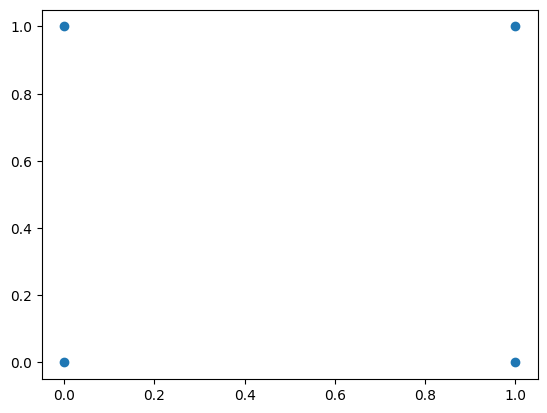

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
epsilon = 1
K = alpha_decaying_kernel(X, alpha=1, epsilon=epsilon)
d = K.sum(axis=1)
A = np.diag(np.sqrt(1/d)) @ (1 - K) @ np.diag(np.sqrt(1/d)) # why? also, inconsistent w/ in code wrt normalization.
# in the code it is 
# A_comp = 1 - np.diag(np.sqrt(1/d)) @ K @ np.diag(np.sqrt(1/d))
tuples, points = Ripser(dimension=1)(A)
# tuples_comp, points_comp = Ripser(dimension=1)(A_comp)
# Add additional information about the dimension of each
# topological feature.
dimension = np.asarray([len(c) - 1 for c, _ in tuples])

# Adds the dimension as an additional column, turning the 2D
# points of the diagram into 3D points.
points = np.column_stack((points, dimension))

In [6]:
points

array([[0.0, 0.31943423, 0],
       [0.0, 0.31943423, 0],
       [0.0, 0.31943423, 0],
       [0.31943423, 0.38248146, 1]], dtype=object)

In [7]:
(points[-1, 1] - points[-1, 0]) / points[-1, 1]

0.16483735

theoretical value matches this.

In [8]:
(np.exp(-1) - np.exp(-np.sqrt(2))) / (1 - np.exp(-np.sqrt(2)))

0.16483744906681938

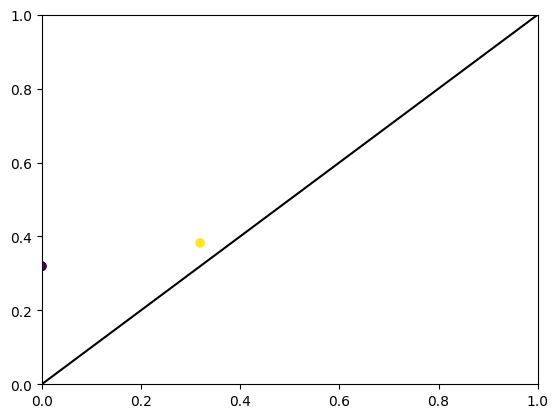

In [9]:
plt.figure()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axline((-0.1, -0.1), slope=1.0, c='k')
plt.scatter(x=points[:, 0], y=points[:, 1], c=points[:, 2])

what is done in current code:

0.07187792


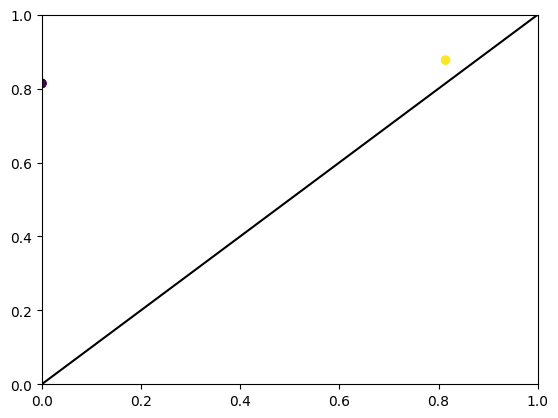

In [10]:
epsilon = 1
K = alpha_decaying_kernel(X, alpha=1, epsilon=epsilon)
d = K.sum(axis=1)
# A = np.diag(np.sqrt(1/d)) @ (1 - K) @ np.diag(np.sqrt(1/d)) # why? also, inconsistent w/ in code wrt normalization.
# in the code it is 
A = 1 - np.diag(np.sqrt(1/d)) @ K @ np.diag(np.sqrt(1/d))
tuples, points = Ripser(dimension=1)(A)
# tuples_comp, points_comp = Ripser(dimension=1)(A_comp)
# Add additional information about the dimension of each
# topological feature.
dimension = np.asarray([len(c) - 1 for c, _ in tuples])

# Adds the dimension as an additional column, turning the 2D
# points of the diagram into 3D points.
points = np.column_stack((points, dimension))
print((points[-1, 1] - points[-1, 0]) / points[-1, 1])
plt.figure()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axline((-0.1, -0.1), slope=1.0, c='k')
plt.scatter(x=points[:, 0], y=points[:, 1], c=points[:, 2])

In [11]:
def calculate_lawvere_homology(epsilon):
    K = alpha_decaying_kernel(X, alpha=1, epsilon=epsilon)
    d = K.sum(axis=1)
    A = np.diag(np.sqrt(1/d)) @ (1 - K) @ np.diag(np.sqrt(1/d)) # why? also, inconsistent w/ in code wrt normalization.
    # in the code it is 
    # A_comp = 1 - np.diag(np.sqrt(1/d)) @ K @ np.diag(np.sqrt(1/d))
    tuples, points = Ripser(dimension=1)(A)
    # tuples_comp, points_comp = Ripser(dimension=1)(A_comp)
    # Add additional information about the dimension of each
    # topological feature.
    dimension = np.asarray([len(c) - 1 for c, _ in tuples])

    # Adds the dimension as an additional column, turning the 2D
    # points of the diagram into 3D points.
    points = np.column_stack((points, dimension))
    return (points[-1, 1] - points[-1, 0]) / points[-1, 1]

def calculate_lawvere_homology_pecan(epsilon):
    K = alpha_decaying_kernel(X, alpha=1, epsilon=epsilon)
    d = K.sum(axis=1)
    # A = np.diag(np.sqrt(1/d)) @ (1 - K) @ np.diag(np.sqrt(1/d)) # why? also, inconsistent w/ in code wrt normalization.
    # in the code it is 
    A = 1 - np.diag(np.sqrt(1/d)) @ K @ np.diag(np.sqrt(1/d))
    tuples, points = Ripser(dimension=1)(A)
    # tuples_comp, points_comp = Ripser(dimension=1)(A_comp)
    # Add additional information about the dimension of each
    # topological feature.
    dimension = np.asarray([len(c) - 1 for c, _ in tuples])

    # Adds the dimension as an additional column, turning the 2D
    # points of the diagram into 3D points.
    points = np.column_stack((points, dimension))
    return (points[-1, 1] - points[-1, 0]) / points[-1, 1]

relative persistense epsilon plot

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/PECAN/pecan/kernels.py:43: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-(D / epsilon)**alpha)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/PECAN/pecan/kernels.py:43: RuntimeWarning: invalid value encountered in divide
  return np.exp(-(D / epsilon)**alpha)


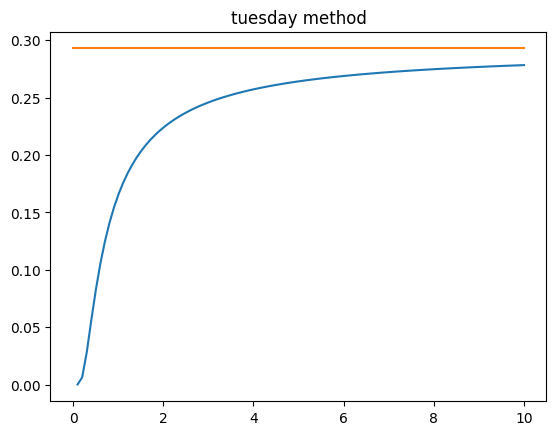

In [12]:
N = 100
persistences = np.ones(N) + np.nan
epsilons = np.linspace(0, 10, N)
for i, epsilon in enumerate(epsilons):
    try:
        persistences[i] = calculate_lawvere_homology(epsilon)
    except:
        pass
plt.figure()
plt.plot(epsilons, persistences)
plt.plot(epsilons, np.ones_like(epsilons) * (1 - 1/np.sqrt(2))) # theoretical value
plt.title("tuesday method")
plt.show()

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/PECAN/pecan/kernels.py:43: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-(D / epsilon)**alpha)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/PECAN/pecan/kernels.py:43: RuntimeWarning: invalid value encountered in divide
  return np.exp(-(D / epsilon)**alpha)


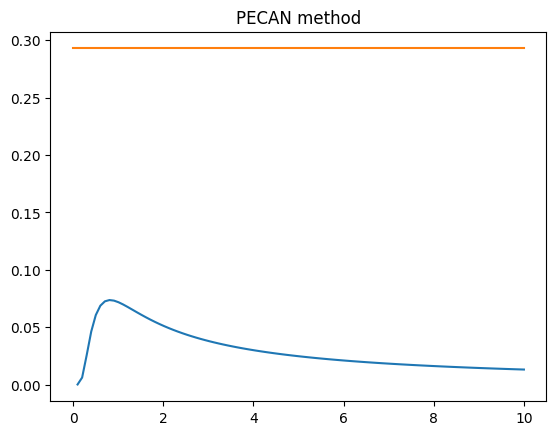

In [13]:
N = 100
persistences = np.ones(N) + np.nan
epsilons = np.linspace(0, 10, N)
for i, epsilon in enumerate(epsilons):
    try:
        persistences[i] = calculate_lawvere_homology_pecan(epsilon)
    except:
        pass
plt.figure()
plt.plot(epsilons, persistences)
plt.plot(epsilons, np.ones_like(epsilons) * (1 - 1/np.sqrt(2))) # theoretical value
plt.title("PECAN method")
plt.show()

/tmp/tmp.vl4svufsKY/ipykernel_2364088/2690373401.py:1: RuntimeWarning: divide by zero encountered in divide
  calc_persistence = lambda x: (np.exp(-1/x)-np.exp(-np.sqrt(2)/x))/(1+2*np.exp(-1/x))


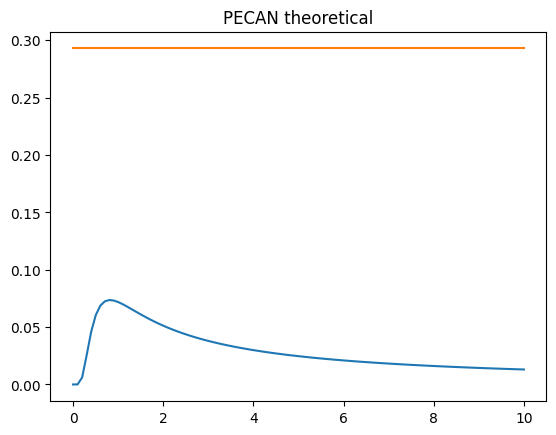

In [14]:
calc_persistence = lambda x: (np.exp(-1/x)-np.exp(-np.sqrt(2)/x))/(1+2*np.exp(-1/x))
persistence_thy = calc_persistence(epsilons)
plt.figure()
plt.plot(epsilons, persistence_thy)
plt.plot(epsilons, np.ones_like(epsilons) * (1 - 1/np.sqrt(2))) # theoretical value
plt.title("PECAN theoretical")
plt.show()

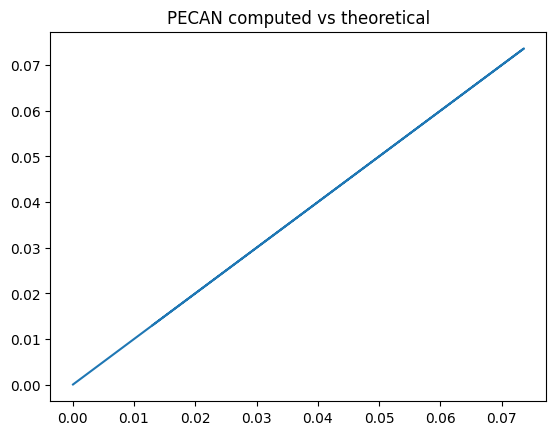

In [16]:
plt.figure()
plt.plot(persistences, persistence_thy)
plt.title("PECAN computed vs theoretical")
plt.show()